# Einführung in Supervised Learning

In diesem Notebook werden die Grundlagen des Supervised Learning eingeführt, welches einen der zentralen Ansätze im Machine Learning bildet. Du erfährst, was Supervised Learning ist, für welche Art von Problemen es eingesetzt wird und wirst anhand eines Beispiels Intuition für diese Methode entwickeln.

### Lernziele
Am Ende des Notebooks kannst du:
- den Begriff **Supervised Learning** verständlich erklären und von **Unsupervised Learning** abgrenzen,
- die Begriffe **Klassifikation** und **Regression** unterscheiden und ihre typische Anwendungsfälle benennen,
- nachvollziehen, wie Modelle aus Daten lernen, indem sie Fehler minimieren,
- ein geeignetes Problem mittels **linearer Regression** mit `scikit-learn` lösen

Dieses Wissen bildet die Grundlage für die folgenden Kapitel, in denen du Klassifikationsmodelle wie **Logistische Regression** und **Random Forests** selbst implementieren und anwenden wirst. Also, los geht's!

## Was ist Supervised Learning?

Supervised Learning ist ein Sammelbegriff für Modelle, die mit _beschrifteten Daten_ trainiert werden. Das sind Daten, bei denen für jede Eingabe ($X$) bereits das zugehörige Ergebnis ($y$) bekannt ist. Das Ziel ist eines Supervised Learning-Modells ist es, aus den Daten eine Funktion zu erstellen, die _neuen, unbekannten_ Eingaben eine gute Vorhersage zuordnen kann. Die Qualität dieser Vorhersagen hängt von der Menge und der Qualität der zur Verfügung stehenden Daten ab.

Ein Supervised-Learning-Problem besteht demnach aus zwei Hauptbestandteilen:
1. **Eingabedaten** $X$ – die Merkmale (oder _Features_), die das Modell erhält, um eine Vorhersage zu treffen.
2. **Zielvariable** $y$ – das Ergebnis (oder _Label_), das wir mit Hilfe der Eingabedaten vorhersagen wollen.

### Beispiele für Supervised Learning

- **Vorhersage des Preises** eines Hauses basierend auf dessen Fläche, Standort und Anzahl der Zimmer. 
- **Klassifizierung von E-Mails** in „Spam“ oder „Nicht-Spam“ basierend auf dem Inhalt und der Struktur der Nachricht.
- **Vorhersage des Produktionsausstoßes** basierend auf Maschineneinstellungen und Umgebungsfaktoren.

### Supervised Learning: Typen

Die Beispiele oben enthalten schond die zwei grundlegenden Typen des Supervised Learning: **Regression** und **Klassifikation**.

1. **Regression**: Bei einer Regressionsaufgabe wird eine **kontinuierliche Zielvariable** vorhergesagt. Das Ziel ist es, eine Funktion zu finden, die die Eingabewerte in kontinuierliche Werte überführt. Ein Beispiel ist die Vorhersage des Aktienkurses oder der Temperatur.
  
2. **Klassifikation**: Bei einer Klassifikationsaufgabe wird eine **diskrete Zielvariable** vorhergesagt. Hierbei handelt es sich um eine festgelegte Anzahl an Klassen, und das Ziel ist es, die Eingabe in eine dieser Klassen zuzuordnen. Ein Beispiel ist die Kategorisierung von Bildern in „Hund“, „Katze“ oder „Pferd“.

### Vergleich: Supervised Learning vs. Unsupervised Learning

Während das Supervised Learning auf **beschrifteten Daten** basiert, arbeitet das **Unsupervised Learning** mit **unbeschrifteten Daten**. Bei unbeschrifteten Daten sind die Zielvariablen nicht bekannt – das Modell hat nur die Eingabedaten $X$ zur Verfügung, ohne dass für diese Eingaben Zielwerte existieren. Das Ziel des Unsupervised Learning ist es daher nicht, eine bestimmte Zielvariable vorherzusagen, sondern **Strukturen oder Muster** innerhalb der Daten zu erkennen.

#### Unterschiede zwischen Supervised und Unsupervised Learning

| Merkmal               | Supervised Learning                         | Unsupervised Learning                            |
|-----------------------|---------------------------------------------|--------------------------------------------------|
| **Zielvariable**      | Vorhersage eines bekannten Labels           | Keine Zielvariable, da keine Labels vorhanden    |
| **Trainingsdaten**    | Beschriftete Daten (mit $X$ und $y$)| Unbeschriftete Daten (nur $X$)               |
| **Ziel**              | Vorhersagen treffen oder klassifizieren     | Muster, Cluster oder Strukturen entdecken        |
| **Beispiel**          | Preisvorhersage, Spam-Klassifikation        | Kundensegmentierung, Anomalie-Erkennung          |
| **Typische Algorithmen** | Lineare Regression, Entscheidungsbäume, Neuronale Netze | K-Means Clustering, PCA, Assoziationsanalyse    |

#### Beispiele für Unsupervised Learning

- **Kundensegmentierung**: Gruppen von Kunden mit ähnlichen Eigenschaften oder Verhaltensmustern erkennen, um zielgerichtete Marketingstrategien zu entwickeln.
- **Anomalieerkennung**: Anomale Datenpunkte, wie z.B. Betrugsversuche bei Kreditkarten, identifizieren.
- **Dimensionalitätsreduktion**: Mit Verfahren wie Principal Component Analysis (PCA) die Anzahl der Variablen reduzieren, um die Daten zu vereinfachen und gleichzeitig die wesentlichen Informationen zu bewahren.

Da es in diesem Notebook um Supervised Learning geht, wollen wir zunächst das einfachste Beispiel des Supervised Learning abdecken, die lineare Regression.

# Lineare Regression
Bevor wir uns in einem zweiten Notebook der Klassifikation zuwenden, starten wir mit der Regression – also mit Vorhersagen kontinuierlicher Werte. Der Grund: Viele der zentralen Ideen des Supervised Learning wie **Modellierung**, **Fehlerminimierung** und **Trainingsprinzipien** lassen sich an Regressionsaufgaben gut erklären.

Wir konzentrieren uns dabei auf das einfachste Regressionsmodell: die **lineare Regression**.
Anhand der linearen Regression lernen wir, die drei Zutaten zu verstehen, die für ein Regressionsmodell notwendig sind:

- 1. Das **Modell** der Vorhersage zu formulieren,
- 2. Den **Fehler** der Vorhersage zu quantifizieren,
- 3. Den Fehler der Vorhersage zu **minimieren**.

Anschließend setzen wir ein einfaches Beispiel mit `scikit-learn` um, um den gesamten Ablauf praktisch nachzuvollziehen.

Diese Grundlagen helfen dir im zweiten Notebook, die **logistische Regression** für Klassifikationsprobleme besser zu verstehen – denn sie basiert auf dem gleichen Rezept, verwendet jedoch andere Zutaten.

## Was ist lineare Regression?

Die lineare Regression ist eines der grundlegendsten Modelle im Supervised Learning. Sie dient dazu, eine **lineare Beziehung** zwischen einer oder mehreren Eingabegrößen (*Features*) und einer Zielgröße (*Label*) zu modellieren. Die Idee: Finde eine Gerade, die möglichst gut durch die gegebenen Datenpunkte passt.

### Zutat 1: Das Modell - Die Gerade

Im linearen Fall ist die Wahl des Modells schon klar: Eine Gerade. Im Fall von nur einem Feature $x$ ist das mathematische Modell also:

\begin{equation}
\hat{y} = w x + b
\tag{1}
\end{equation}

* $x$: Eingabewert (z. B. die Fläche eines Hauses)
* $\hat{y}$: vorhergesagter Zielwert (z. B. der Hauspreis)
* $w$: Gewicht (Steigung der Geraden)
* $b$: Bias (Achsenabschnitt)

Ziel ist es, die Parameter $w$ und $b$ so zu wählen, dass die Gerade möglichst gut zu den vorhandenen Daten passt.

**Achtung:**
Es sollte klar sein, dass die Annahme einer linearen Beziehung zwischen den Features und dem Label nicht immer gerechtfertigt ist. Beispielsweise ist der Zusammenhang zwischen der Außentemperatur und dem Stromverbrauch **nicht linear** – bei sehr niedrigen **und** sehr hohen Temperaturen steigt der Verbrauch, während er in einem mittleren Bereich eher konstant bleibt. Weiterhin kann die lineare Beziehung ab einem bestimmten Wertebereich scheitern. In solchen Fällen kann ein lineares Modell die Realität **nur unzureichend abbilden** und komplexere Modelle wie Polynomregressionen oder nichtlineare Verfahren (z. B. Entscheidungsbäume oder neuronale Netze) könnnten besser geeignet sein.

<center><img src="https://miro.medium.com/v2/resize:fit:922/1*_qoaFqMVgjstmtJNp-zNrw.png"></center>

#### Mehrdimensionaler Fall

Im Allgemeinen haben wir allerdings nicht nur _ein_ Feature, sondern z.B. $p$ verschiedene. Um beim Beispiel des Hauspreises zu bleiben:

\begin{align*}
x_1: \mathrm{Quadratmeter}, \quad & x_2: \mathrm{Zimmeranzahl}, & \dots & \quad x_p: \mathrm{Nähe \, zum \, Zentrum}
\end{align*}

Wir haben außerdem nicht nur _einen_ Feature-Vektor (von _einem_ Haus), sondern viele Daten von z.B. $n$ Häusern:
\begin{align*}
x^{(1)} = \begin{pmatrix} 200 & 3 & \dots \end{pmatrix}, \quad & x^{(2)} = \begin{pmatrix} 840 & 6 & \dots \end{pmatrix}, & \dots & \quad x^{(n)} = \begin{pmatrix} 20 & 1 & \dots \end{pmatrix}
\end{align*}
Für jedes dieser Häuser wollen wir _einen_ Wert (den Preis) vorhersagen. Unser Wert $\hat{y}$ wird also zu einem ($n \times 1$)-Vektor. Da nun außerdem zu jedem der $p$ Features ein separates Gewicht $w_i$ gehört, wird $w$ zu einem ($p \times 1$)-Vektor. Weiterhin gibt es nun für jedes der insgesamt $n$ Häuser nicht nur ein Feature, sondern einen Feature-Vektor mit $p$ Features. Dadurch wird $x$ zu einer ($n \times p$)-Matrix $X$. Auch $b$ muss jetzt auf alle $n$ Datenpunkte angewendet werden und wird zu einem ($n \times 1$)-Vektor. Insgesamt wird Formel $(1)$ damit zu:

\begin{equation}
\hat{y} = X w + b
\tag{2}
\end{equation}

Macht euch klar, dass die Dimensionen auf der rechten Seite so übereinstimmen, dass alle Operationen definiert sind und wie gewünscht einen Vektor der Dimension ($n \times 1$) ergeben.

**Anmerkung**: Es ist mathematisch gesehen egal, ob man am Ende $b$ addiert oder den Parameter gleich in den Gewichts-Vektor $w$ einbaut. Wenn man $X_{\mathrm{new}} = \begin{pmatrix} x_1^{(1)} & x_2^{(1)} & \dots & 1 \\ x_1^{(2)} & x_2^{(2)} & \dots & 1 \\ \dots & \dots & \dots & \dots \end{pmatrix}$ wählt und $w_{\mathrm{new}} = \begin{pmatrix} w_1 & w_2 & \dots & b \end{pmatrix}^\top$, dann ist folgender Ausdruck äquivalent zu Gleichung $(2)$:

$$
\hat{y} = X_{\mathrm{new}} w_{\mathrm{new}}
$$

$X$ und $w$ bekommen dann eine zusätzliche Dimension und nehmen jeweils die Form $(n \times (p+1))$ und $((p+1) \times 1)$ an. Überprüft die Äquivalenz selbst, wenn ihr euch unsicher seid.

### Zutat 2: Die Verlustfunktion - Der Mean Squared Error

Damit das Modell die optimalen Parameter „lernt“, brauchen wir ein Maß dafür, wie gut (oder schlecht) eine bestimmte Wahl von $w$ und $b$ ist. Dafür verwenden wir eine **Verlustfunktion** (engl. _loss function_). Bei der linearen Regression ist das typischerweise der **mittlere quadratische Fehler (Mean Squared Error, MSE)**:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$

* $y_i$: tatsächlicher Zielwert
* $\hat{y}_i$: vorhergesagter Zielwert ($w \cdot x + b$)
* $n$: Anzahl der Trainingsbeispiele

Die Funktion misst die Abweichung zwischen einer Vorhersage des Modells ($\hat{y}_i$) und dem wirklichen Wert ($y_i$), quadriert diese Abweichung und summiert sie über alle Trainingsdaten. Die Abweichung, also $(y_i - \hat{y}_i)$ wird auch Residuum (lat. Rest, pl. Residuen) genannt. Die Funktion ist durch die Quadrierung der Residuen immer größer als 0 und wird nur 0, wenn die Vorhersage in jedem Punkt mit dem richtigen Wert übereinstimmt.
Durch die Quadrierung wiegen kleine Fehler übrigens auch weniger als große Fehler, beziehungsweise: Ausreißer dominieren den MSE-Fehler.

**Praktische Übung:**
In der Folgenden Zelle kannst du ein Gefühl dafür bekommen, wie die MSE-Funktion in einer Dimension funktioniert. Führe die Zelle aus und benutze die Slider, um einen möglichst geringen MSE-Wert zu erreichen. Kannst du dir vorstellen, warum der geringste MSE-Wert nicht exakt bei den "richtigen" Parameterwerten ($w=2$, $b=1$) erreicht wird?

**Weiterführende Aufgabe:**
Füge im Code einen zusätzlichen Ausreißer-Datenpunkt hinzu (z.B. $(10, 99)$) und beobachte, wie sich der MSE-Wert verändert. Beschreibt die Gerade mit dem geringsten Verlust die Datenpunkte immer noch gut?

In [ ]:
### Einmalig ausführen, damit das Widget funktioniert
!git clone https://github.com/wolfromanlist/MLForEngineers.git
%cd MLForEngineers/Notebooks/

from google.colab import output
output.enable_custom_widget_manager()

In [3]:
import numpy as np
from RegressionWidget_Plotly import RegressionWidget

# Daten vorbereiten
generator = np.random.default_rng(2948292983384)
x = np.linspace(0, 20, 10)
y_real = 2 * x + 1 + 15 * (generator.random((1, 10)) - 0.5)
y_real = y_real.flatten()

###
# Hier Code zur weiterführenden Aufgabe einfügen
###

widget = RegressionWidget(x, y_real)
widget.show()

Output()

### Zutat 3: Die Minimierung des Fehlers

Wie bereits erwähnt ist das Ziel des Trainings, die Werte von $w$ und $b$ so zu wählen, dass der Fehler (MSE) möglichst klein wird. Dafür gibt es verschiedene Verfahren. Für die lineare Regression gibt es eine **analytische Lösung durch Ordinary Least Squares (OLS)** oder auch **iterative Verfahren** wie Gradient Descent.

In diesem Notebook verwenden wir zunächst die OLS-Methode, da sie eine anschauliche, mathematisch exakte Lösung liefert. Dem Gradient Descent-Verfahren werden wir uns in späteren Lektionen zu neuronalen Netzen noch widmen.

#### Ordinary Least Squares (OLS)

**Ordinary Least Squares**, oder der Algorithmus der kleinsten Quadrate, ist ein Verfahren zur Bestimmung der „besten“ Parameter in der linearen Regression. Ziel ist es, die Steigung und den Achsenabschnitt einer Linie so zu berechnen, dass die Summe der quadrierten Residuen (also die Fläche der Quadrate im Bild) minimiert wird. OLS ist für die meisten linearen Regressionsprobleme sehr effizient.

![Least Squares](https://kenndanielso.github.io/mlrefined/mlrefined_images/superlearn_images/Least_Squares.png)

#### Mathematische Grundlage des OLS-Algorithmus

Die lineare Regression beschreibt eine Zielvariable $y$ als lineare Funktion der unabhängigen Variablen $X$. Also $\hat{y} = X w$, wobei wie bereits erwähnt:
- $X$: Matrix der unabhängigen Variablen (Dimension $n \times (p + 1)$, mit $n$ Datenpunkten und $p$ Variablen, $+1$ für den $b$-Parameter),
- $w$: Vektor der Parameter, die es zu bestimmen gilt (Dimension $(p+1) \times 1 $),
- $\hat{y}$: Vektor der vorhergesagten Werte (Dimension $ n \times 1 $).

Das Ziel des OLS ist es, die Parameter $w$ so zu wählen, dass der **Mean Squared Error (MSE)** minimiert wird:

$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 = \frac{1}{n} \sum_{i=1}^{n} (y_i - (Xw)_i)^2 = \frac{1}{n} \left( (y - X w)^T (y - X w) \right)
$$

wobei $y_i$ die tatsächlichen Werte und $\hat{y}_i$ die durch das (lineare) Modell vorhergesagten Werte sind.

Um die Werte für $w$ zu bestimmen, wird die MSE als Funktion von $w$ abgeleitet und auf null gesetzt:
$\frac{\partial}{\partial w} \left( (y - X w)^T (y - X w) \right) = 0$. \
Dies ergibt die sogenannte **Normalengleichung**:

$$w = (X^T X)^{-1} X^T y$$

Hierbei ist:
- $X^T$ die Transponierte der Matrix $X$,
- $(X^T X)^{-1}$  die Inverse von $ X^T X$, vorausgesetzt, $ X^T X $ ist invertierbar.

Durch Lösen dieser Gleichung erhält man die optimalen Werte für die Parameter $w$, welche die Summe der quadrierten Residuen minimieren.
Für die Berechnung der Parameter in der OLS-Regression sind lediglich **lineare Algebra-Berechnungen** nötig, insbesondere Matrizenmultiplikation, Transponieren und Invertieren. Es werden **keine neuronalen Netze oder iterativen Trainingsverfahren** wie bei anderen Machine-Learning-Algorithmen verwendet. Stattdessen wird ein einmaliger analytischer Lösungsschritt durchgeführt, der die optimalen Parameterwerte direkt berechnet.

### 3. Diskussion: Ist lineare Regression Machine Learning?

Es gibt eine Diskussion darüber, ob lineare Regression tatsächlich als **Machine Learning** gezählt werden sollte oder ob sie besser als **statistisches Modell** betrachtet wird. Diese Debatte beruht auf der Tatsache, dass **Machine Learning** typischerweise auf Verfahren basiert, die aus den Daten iterativ „lernen“ und auf Rückkopplung (wie Fehlerausgleich bei neuronalen Netzen) angewiesen sind. Lineare Regression mit OLS hingegen ist ein **deterministisches Verfahren** und wird analytisch berechnet, ohne dass Lernschritte oder Fehleranpassungen erforderlich sind.

#### Argumente, warum lineare Regression als Machine Learning betrachtet werden könnte:
1. **Vorhersagefähigkeit**: Lineare Regression wird für Vorhersagen eingesetzt, und die Nutzung von Daten für Vorhersagen ist ein zentraler Bestandteil des Machine Learnings.
2. **Teil vieler ML-Frameworks**: Lineare Regression ist in allen ML-Frameworks (wie `scikit-learn`) implementiert und wird in praktischen ML-Workflows oft angewandt.
3. **Modellbewertung und Anpassung**: Viele der Metriken und Evaluationsmethoden, die in ML für die Modellbewertung verwendet werden, wie der MSE oder der R²-Score, sind auch für lineare Regression relevant.
4. **Möglichkeit zur iterativen Lösung**: Da eine analytische Lösung des Problems existiert wird zumeist der OLS-Algorithmus angewandt. Allerdings würde sich das Problem auch iterativ durch z.B. Gradient Descent lösen lassen. Aber warum mit Kanonen auf Spatzen schießen? ;)

Zusammenfassend lässt sich sagen, dass die lineare Regression an der Grenze zwischen Statistik und Machine Learning liegt. Sie wird oft als „einfachstes“ Machine-Learning-Modell betrachtet, auch wenn sie auf analytischen Lösungen basiert und nicht wie andere Modelle durch iterative Optimierung lernt.

## Datenvorbereitung



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import plotly.graph_objs as go
import plotly.io as pio
pio.renderers.default = 'notebook_connected'
import matplotlib.pyplot as plt

Datenüberblick:
   machines  fabrication_time
0         5         67.906597
1         7         56.106398
2         6         50.994477
3         5         63.666157
4         4         35.097613

Fehlende Werte:
 machines            0
fabrication_time    0
dtype: int64


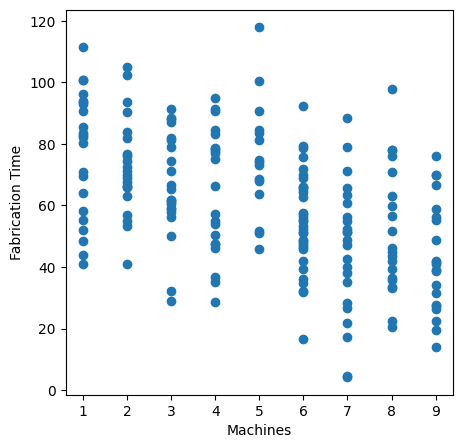


Erste Zeilen der standardisierten Trainingsdaten:
 [[ 0.36712254]
 [ 1.15031731]
 [-1.19926698]
 [-0.8076696 ]
 [ 0.75871992]]

Modell-Koeffizienten: [-10.46601926]
Modell-Achsenabschnitt: 61.01192151742241
Mean Absolute Error (MAE): 14.81
Mean Squared Error (MSE): 338.12
Root Mean Squared Error (RMSE): 18.39
R²-Score: 0.29


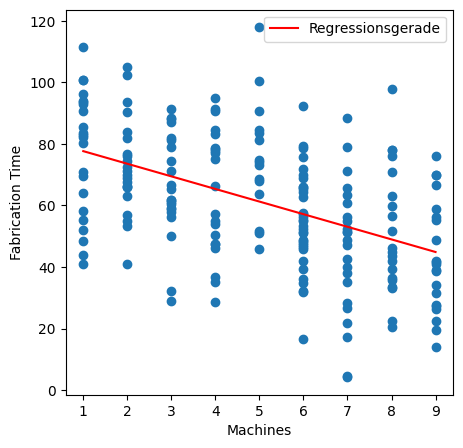

In [ ]:
data = {
    'machines': [5, 7, 6, 5, 4, 6, 4, 9, 9, 4, 8, 5, 6, 9, 1, 1, 1, 8, 8, 8, 9, 8, 5, 8, 2, 6, 2, 9, 5, 4, 3, 7, 5, 6, 1, 6, 6, 6, 9, 7, 4, 4, 7, 1, 7, 7, 2, 2, 3, 4, 6, 4, 9, 1, 2, 2, 6, 3, 5, 3, 2, 1, 6, 2, 2, 4, 8, 1, 8, 1, 9, 5, 9, 6, 7, 1, 3, 2, 3, 2, 3, 4, 1, 7, 6, 3, 5, 1, 6, 9, 3, 7, 2, 7, 3, 2, 6, 1, 8, 1, 7, 3, 7, 9, 3, 6, 6, 6, 3, 9, 5, 8, 7, 3, 8, 4, 8, 6, 8, 7, 7, 5, 9, 6, 4, 6, 1, 3, 6, 3, 6, 4, 2, 3, 6, 6, 6, 6, 6, 4, 9, 4, 4, 9, 8, 7, 1, 9, 7, 9, 2, 8, 2, 6, 2, 8, 8, 6, 4, 1, 7, 5, 7, 8, 9, 8, 1, 4, 7, 2, 5, 1, 2, 1, 8, 3, 4, 9, 7, 1, 2, 6, 6, 3, 9, 6, 5, 6, 7, 3, 4, 2, 2, 9, 7, 5, 3, 3, 1, 4],  # Anzahl Maschinen zwischen 1 und 10
    'fabrication_time': [67.90659729035198, 56.106398427806, 50.994476604973414, 63.666157089643946, 35.097612868648845, 32.039833707027626, 66.22680286228086, 40.91527383975611, 48.867428230641316, 77.69669211415139, 63.07560396856529, 45.89042085563238, 52.20593417172311, 27.30510517168884, 69.6177453658591, 82.13627375506708, 58.139671112137194, 39.315616233114596, 51.63499475754276, 97.85085245947315, 38.92949586215649, 78.14891087454242, 68.70782501306948, 46.16582567194396, 72.598794661039, 55.24179039710023, 41.11241643004889, 38.594792865390716, 51.16164124843421, 78.76401692708872, 56.239836533941755, 63.393261942848085, 83.52764098974014, 36.19921294222919, 55.182435834569766, 34.78883895358819, 46.38616051561113, 48.79466757223236, 34.02959683412472, 60.85055782908546, 90.67782246593318, 57.24481685489761, 47.037841141403355, 43.93312789297632, 78.96797772153707, 38.15826223175094, 71.21559600097471, 53.18216031548334, 28.853956747650273, 54.8303899393927, 45.80516278988078, 91.30537447515269, 69.97685723661004, 85.55656333629403, 104.97772561171456, 66.09947475701892, 62.764768325961676, 78.91392252447335, 74.64019759627901, 60.57725728949825, 56.9839969465905, 48.579830027949896, 47.20662557974444, 76.10314583605629, 93.62446896110454, 78.25812129758577, 44.74242472475136, 92.90755164421435, 43.64971697594392, 51.94064887049821, 56.39644485754042, 90.70268368121174, 14.028412708516182, 78.80920713092596, 4.6665365589671595, 80.16239734546595, 87.07945827760282, 66.1492734651707, 61.71733893473774, 68.9224748880462, 91.22202398311339, 84.46341633231, 94.00935416779004, 35.15987349227268, 47.69852376864201, 32.252887170234516, 73.12243955878206, 64.07761682282565, 65.86885886438505, 66.61652799986359, 88.49868073361267, 51.28827909191848, 82.02019094615521, 21.761545210594083, 87.99994772467629, 66.34439226208434, 16.47192323984454, 100.83222689115654, 76.21779733731799, 96.38388383772445, 65.72419493485988, 74.38527268575467, 26.80197950654918, 41.50446924010041, 61.863283328424366, 39.49800007684461, 68.990817803787, 53.26751660288785, 82.06237501921653, 31.630927077808536, 100.29992291148659, 59.793839611242916, 52.44257667219292, 65.23336887096886, 22.58095393190783, 53.855828713502596, 42.04839568709444, 64.40929844078353, 78.14569130983777, 17.404842492156654, 39.96031919794722, 51.54856532411142, 22.497316809208563, 31.746408303106108, 75.03445230345193, 57.15307858769192, 70.93343144333274, 81.22225806773736, 65.32378568074694, 66.57938969449042, 55.00847205146495, 83.17390262742492, 55.071565260184684, 59.108692254001305, 71.71103849542581, 75.91439407068657, 66.13749142380996, 51.2733879726916, 69.86123409331486, 47.53081979399407, 27.760562662587123, 50.34416051459668, 46.18057304022479, 41.80371755987022, 70.9469549397791, 42.6864364658868, 90.58356187823917, 69.81565342227196, 51.46703718049807, 26.478380717491632, 83.98950295344697, 33.24094688557501, 63.23721436234395, 48.317552109618454, 74.41215717296778, 56.72007643826732, 36.45774949036193, 79.18680519315623, 47.59243427550278, 83.60323955938493, 4.170699399782073, 81.27226622532305, 28.2539005830036, 35.90818049938248, 55.36494198159164, 33.354080512296676, 111.58309016181767, 76.91591586973249, 88.28705314452364, 67.76371772175122, 84.42891096771852, 82.94001419515943, 102.57108923015268, 100.94158243174151, 20.3685513106142, 50.13523568533148, 94.93894016992677, 19.665713605376006, 71.19992123859808, 93.79698096311375, 90.31444059009648, 56.3076148363576, 57.55097075036535, 71.25084953116342, 76.0042650733056, 92.47032958489332, 117.9433607884537, 41.89113000579377, 48.62170549792494, 58.786490510900165, 36.729371870689526, 69.83217866088724, 76.74098645018402, 58.98636579202069, 54.94520268498698, 73.98676297983195, 61.28824021252155, 57.78097284709512, 41.01048210648257, 28.48348413537319]  # Zielvariable: Fertigungszeit
}

df = pd.DataFrame(data)

# Überblick über die Daten
print("Datenüberblick:")
print(df.head())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte:\n", df.isnull().sum())

# Aufteilen in Features (X) und Zielvariable (y)
X = df[['machines']].values
y = df['fabrication_time'].values

fig, ax = plt.subplots(figsize = (5,5))
ax.scatter(X, y)
plt.xlabel('Machines')
plt.ylabel('Fabrication Time')
plt.show()

# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardisieren der Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nErste Zeilen der standardisierten Trainingsdaten:\n", X_train[:5]) # standard scaler transformiert dataframe zu numpy array! Gängige df-Methoden nicht anwendbar

from sklearn.linear_model import LinearRegression

# Modellinitialisierung und Training
model = LinearRegression()
model.fit(X_train, y_train)

# Ausgabe der Modellparameter
print("\nModell-Koeffizienten:", model.coef_)
print("Modell-Achsenabschnitt:", model.intercept_)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Vorhersagen auf den standardisierten Testdaten
y_pred = model.predict(X_test)

# Berechnung der Metriken auf der Originalskala
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Ausgabe der Metriken
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²-Score: {r2:.2f}")

fig, ax = plt.subplots(figsize=(5,5))
x = np.arange(1,10).reshape(-1,1)
x_scaled = scaler.transform(x)
y_pred_line = model.predict(x_scaled)
ax.plot(x, y_pred_line, color = 'red', label='Regressionsgerade')
ax.scatter(X, y)
plt.xlabel('Machines')
plt.ylabel('Fabrication Time')
plt.legend()
plt.show()



In [ ]:
data = {
    'machines': [5, 7, 6, 5, 4, 6, 4, 9, 9, 4, 8, 5, 6, 9, 1, 1, 1, 8, 8, 8, 9, 8, 5, 8, 2, 6, 2, 9, 5, 4, 3, 7, 5, 6, 1, 6, 6, 6, 9, 7, 4, 4, 7, 1, 7, 7, 2, 2, 3, 4, 6, 4, 9, 1, 2, 2, 6, 3, 5, 3, 2, 1, 6, 2, 2, 4, 8, 1, 8, 1, 9, 5, 9, 6, 7, 1, 3, 2, 3, 2, 3, 4, 1, 7, 6, 3, 5, 1, 6, 9, 3, 7, 2, 7, 3, 2, 6, 1, 8, 1, 7, 3, 7, 9, 3, 6, 6, 6, 3, 9, 5, 8, 7, 3, 8, 4, 8, 6, 8, 7, 7, 5, 9, 6, 4, 6, 1, 3, 6, 3, 6, 4, 2, 3, 6, 6, 6, 6, 6, 4, 9, 4, 4, 9, 8, 7, 1, 9, 7, 9, 2, 8, 2, 6, 2, 8, 8, 6, 4, 1, 7, 5, 7, 8, 9, 8, 1, 4, 7, 2, 5, 1, 2, 1, 8, 3, 4, 9, 7, 1, 2, 6, 6, 3, 9, 6, 5, 6, 7, 3, 4, 2, 2, 9, 7, 5, 3, 3, 1, 4],  # Anzahl Maschinen zwischen 1 und 10
    'complexity': [2, 3, 2, 1, 1, 1, 3, 2, 3, 4, 4, 1, 3, 2, 1, 4, 2, 2, 3, 4, 3, 4, 2, 4, 1, 4, 3, 1, 4, 3, 2, 1, 3, 1, 1, 2, 2, 2, 2, 3, 4, 1, 3, 1, 3, 2, 3, 1, 1, 2, 2, 4, 4, 3, 4, 1, 3, 3, 4, 2, 1, 1, 1, 4, 3, 4, 2, 3, 1, 2, 4, 4, 2, 4, 1, 4, 4, 4, 3, 4, 2, 4, 3, 1, 2, 1, 4, 2, 2, 3, 2, 1, 4, 1, 3, 1, 1, 4, 4, 4, 4, 4, 2, 1, 2, 1, 1, 1, 3, 1, 4, 1, 1, 1, 3, 1, 2, 3, 4, 3, 2, 1, 1, 2, 2, 2, 3, 3, 2, 2, 1, 4, 1, 3, 4, 4, 2, 2, 3, 2, 2, 1, 2, 1, 4, 1, 3, 2, 3, 4, 3, 1, 2, 3, 3, 3, 2, 1, 2, 4, 1, 4, 3, 2, 4, 2, 3, 2, 4, 3, 3, 2, 4, 3, 1, 1, 4, 4, 2, 3, 4, 2, 4, 3, 4, 4, 4, 1, 3, 2, 1, 2, 2, 4, 1, 4, 2, 2, 1, 1],  # Komplexitätsskala von 1 bis 4
    'fabrication_time': [67.90659729035198, 56.106398427806, 50.994476604973414, 63.666157089643946, 35.097612868648845, 32.039833707027626, 66.22680286228086, 40.91527383975611, 48.867428230641316, 77.69669211415139, 63.07560396856529, 45.89042085563238, 52.20593417172311, 27.30510517168884, 69.6177453658591, 82.13627375506708, 58.139671112137194, 39.315616233114596, 51.63499475754276, 97.85085245947315, 38.92949586215649, 78.14891087454242, 68.70782501306948, 46.16582567194396, 72.598794661039, 55.24179039710023, 41.11241643004889, 38.594792865390716, 51.16164124843421, 78.76401692708872, 56.239836533941755, 63.393261942848085, 83.52764098974014, 36.19921294222919, 55.182435834569766, 34.78883895358819, 46.38616051561113, 48.79466757223236, 34.02959683412472, 60.85055782908546, 90.67782246593318, 57.24481685489761, 47.037841141403355, 43.93312789297632, 78.96797772153707, 38.15826223175094, 71.21559600097471, 53.18216031548334, 28.853956747650273, 54.8303899393927, 45.80516278988078, 91.30537447515269, 69.97685723661004, 85.55656333629403, 104.97772561171456, 66.09947475701892, 62.764768325961676, 78.91392252447335, 74.64019759627901, 60.57725728949825, 56.9839969465905, 48.579830027949896, 47.20662557974444, 76.10314583605629, 93.62446896110454, 78.25812129758577, 44.74242472475136, 92.90755164421435, 43.64971697594392, 51.94064887049821, 56.39644485754042, 90.70268368121174, 14.028412708516182, 78.80920713092596, 4.6665365589671595, 80.16239734546595, 87.07945827760282, 66.1492734651707, 61.71733893473774, 68.9224748880462, 91.22202398311339, 84.46341633231, 94.00935416779004, 35.15987349227268, 47.69852376864201, 32.252887170234516, 73.12243955878206, 64.07761682282565, 65.86885886438505, 66.61652799986359, 88.49868073361267, 51.28827909191848, 82.02019094615521, 21.761545210594083, 87.99994772467629, 66.34439226208434, 16.47192323984454, 100.83222689115654, 76.21779733731799, 96.38388383772445, 65.72419493485988, 74.38527268575467, 26.80197950654918, 41.50446924010041, 61.863283328424366, 39.49800007684461, 68.990817803787, 53.26751660288785, 82.06237501921653, 31.630927077808536, 100.29992291148659, 59.793839611242916, 52.44257667219292, 65.23336887096886, 22.58095393190783, 53.855828713502596, 42.04839568709444, 64.40929844078353, 78.14569130983777, 17.404842492156654, 39.96031919794722, 51.54856532411142, 22.497316809208563, 31.746408303106108, 75.03445230345193, 57.15307858769192, 70.93343144333274, 81.22225806773736, 65.32378568074694, 66.57938969449042, 55.00847205146495, 83.17390262742492, 55.071565260184684, 59.108692254001305, 71.71103849542581, 75.91439407068657, 66.13749142380996, 51.2733879726916, 69.86123409331486, 47.53081979399407, 27.760562662587123, 50.34416051459668, 46.18057304022479, 41.80371755987022, 70.9469549397791, 42.6864364658868, 90.58356187823917, 69.81565342227196, 51.46703718049807, 26.478380717491632, 83.98950295344697, 33.24094688557501, 63.23721436234395, 48.317552109618454, 74.41215717296778, 56.72007643826732, 36.45774949036193, 79.18680519315623, 47.59243427550278, 83.60323955938493, 4.170699399782073, 81.27226622532305, 28.2539005830036, 35.90818049938248, 55.36494198159164, 33.354080512296676, 111.58309016181767, 76.91591586973249, 88.28705314452364, 67.76371772175122, 84.42891096771852, 82.94001419515943, 102.57108923015268, 100.94158243174151, 20.3685513106142, 50.13523568533148, 94.93894016992677, 19.665713605376006, 71.19992123859808, 93.79698096311375, 90.31444059009648, 56.3076148363576, 57.55097075036535, 71.25084953116342, 76.0042650733056, 92.47032958489332, 117.9433607884537, 41.89113000579377, 48.62170549792494, 58.786490510900165, 36.729371870689526, 69.83217866088724, 76.74098645018402, 58.98636579202069, 54.94520268498698, 73.98676297983195, 61.28824021252155, 57.78097284709512, 41.01048210648257, 28.48348413537319]  # Zielvariable: Fertigungszeit
}

df = pd.DataFrame(data)

# Überblick über die Daten
print("Datenüberblick:")
print(df.head())

# Überprüfen auf fehlende Werte
print("\nFehlende Werte:\n", df.isnull().sum())

# Aufteilen in Features (X) und Zielvariable (y)
X = df[['machines', 'complexity']].values
y = df['fabrication_time'].values

fig = go.Figure()

# Scatter plot of actual values
fig.add_trace(go.Scatter3d(
    x=X[:,0], y=X[:,1], z=y,
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Actual Fabrication Time'
))

fig.update_layout(
    title="Fabrication Time: Machines vs Complexity",
    scene=dict(
        xaxis_title="Machines",
        yaxis_title="Complexity",
        zaxis_title="Fabrication Time"
    ),
    width=700, height=600
)

fig.show()


# Aufteilen in Trainings- und Testdaten
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Standardisieren der Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("\nErste Zeilen der standardisierten Trainingsdaten:\n", X_train[:5])


Datenüberblick:
   machines  complexity  fabrication_time
0         5           2         67.906597
1         7           3         56.106398
2         6           2         50.994477
3         5           1         63.666157
4         4           1         35.097613

Fehlende Werte:
 machines            0
complexity          0
fabrication_time    0
dtype: int64



Erste Zeilen der standardisierten Trainingsdaten:
 [[ 0.36712254  1.28435589]
 [ 1.15031731 -0.47956636]
 [-1.19926698  0.40239476]
 [-0.8076696  -1.36152749]
 [ 0.75871992  1.28435589]]


## Modellbildung

In [17]:
from sklearn.linear_model import LinearRegression

# Modellinitialisierung und Training
model = LinearRegression()
model.fit(X_train, y_train)

# Ausgabe der Modellparameter
print("\nModell-Koeffizienten:", model.coef_)
print("Modell-Achsenabschnitt:", model.intercept_)



Modell-Koeffizienten: [-10.19263862  12.1339451 ]
Modell-Achsenabschnitt: 61.01192151742241


In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Vorhersagen auf den standardisierten Testdaten
y_pred = model.predict(X_test)

# Berechnung der Metriken auf der Originalskala
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Ausgabe der Metriken
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R²-Score: {r2:.2f}")

Mean Absolute Error (MAE): 11.60
Mean Squared Error (MSE): 221.84
Root Mean Squared Error (RMSE): 14.89
R²-Score: 0.53


In [19]:
coefs = model.coef_
intercept = model.intercept_

def best_fit_plane(x, y, coef1, coef2, intercept):
    return coef1 * x + coef2 * y + intercept


# Rücktransformation der Standardisierung für X_test, um die Originalskala zu erhalten
print(X_test[:5])
X_test_original = scaler.inverse_transform(X_test)
print(X_test_original[:5])

# Plot 1: Machines vs Complexity vs Fabrication Time
x_vals_original = X_test_original[:, 0]  # Machines
y_vals_original = X_test_original[:, 1]  # Complexity

fig = go.Figure()

# Scatter plot of actual values
fig.add_trace(go.Scatter3d(
    x=x_vals_original, y=y_vals_original, z=y_test,
    mode='markers',
    marker=dict(size=4, color='blue', opacity=0.5),
    name='Actual Fabrication Time'
))

# Scatter plot of predicted values
fig.add_trace(go.Scatter3d(
    x=x_vals_original, y=y_vals_original, z=y_pred,
    mode='markers',
    marker=dict(size=4, color='red', opacity=0.5),
    name='Predicted Fabrication Time'
))

x_mesh, y_mesh = np.meshgrid(np.linspace(x_vals_original.min(), x_vals_original.max(), 2),
                             np.linspace(y_vals_original.min(), y_vals_original.max(), 2))


# Standardisiere die Gitterwerte, um sie in das Modell einsetzen zu können
x_mesh_scaled = scaler.transform(np.c_[x_mesh.ravel(), y_mesh.ravel()])[:, 0]
y_mesh_scaled = scaler.transform(np.c_[x_mesh.ravel(), y_mesh.ravel()])[:, 1]


# Berechne die z-Werte für die Best-Fit-Plane auf Basis der skalierten Gitterwerte
z_mesh = best_fit_plane(x_mesh_scaled, y_mesh_scaled, coefs[0], coefs[1], intercept).reshape(x_mesh.shape)

fig.add_trace(go.Surface(
    x=x_mesh, y=y_mesh, z=z_mesh,
    colorscale='Viridis',
    opacity=0.5,
    showscale=False,
    name='Best Fit Plane'
))

# Customize layout
fig.update_layout(
    title="Fabrication Time: Machines vs Complexity",
    scene=dict(
        xaxis_title="Machines",
        yaxis_title="Complexity",
        zaxis_title="Fabrication Time"
    ),
    width=700, height=600
)

fig.show()

[[ 1.15031731  0.40239476]
 [-0.02447484  0.40239476]
 [ 0.36712254 -1.36152749]
 [ 1.15031731  1.28435589]
 [ 1.54191469  1.28435589]]
[[8. 3.]
 [5. 3.]
 [6. 1.]
 [8. 4.]
 [9. 4.]]


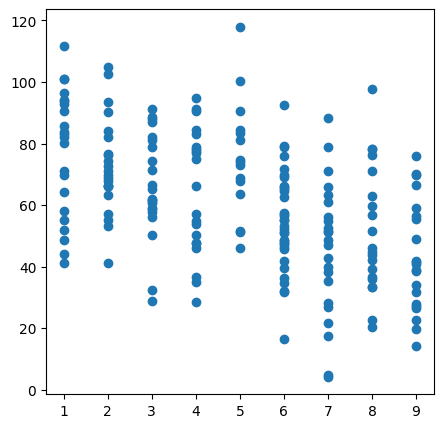

In [24]:
def generate_linear_data(n_samples=200, coef1=2.0, coef2=3.0, intercept=5.0, noise_level=1.0,
                         x1_range=(0, 10), x2_range=(0, 10), x1_type=float, x2_type=float, random_state=0, dimension=2):
    """
    Erzeugt synthetische Daten mit einer linearen Abhängigkeit zwischen einer oder zwei Eingangsvariablen und einer Zielvariable,
    plus zufälligem Rauschen. Ermöglicht die Einstellung der Wertebereiche und Datentypen für x1 und x2.
    Mit dem Argument 'dimension' kann zwischen 1D- und 2D-Ausgabe gewechselt werden.

    Parameters:
        n_samples (int): Anzahl der zu generierenden Datenpunkte.
        coef1 (float): Koeffizient für die erste Eingangsvariable.
        coef2 (float): Koeffizient für die zweite Eingangsvariable.
        intercept (float): Achsenabschnitt (y-Achsenwert, wenn x1 und x2 null sind).
        noise_level (float): Standardabweichung des zufälligen Rauschens.
        x1_range (tuple): Wertebereich (min, max) für x1.
        x2_range (tuple): Wertebereich (min, max) für x2.
        x1_type (type): Datentyp für x1 (int oder float).
        x2_type (type): Datentyp für x2 (int oder float).
        random_state (int): Seed für den Zufallszahlengenerator zur Reproduzierbarkeit.
        dimension (int): 1 für 1D (nur x1), 2 für 2D (x1 und x2).

    Returns:
        pd.DataFrame: Ein DataFrame mit den Spalten 'x1', optional 'x2', und 'y'.
    """
    np.random.seed(random_state)

    x1 = np.random.uniform(x1_range[0], x1_range[1], n_samples).astype(x1_type)
    if dimension == 1:
        y = coef1 * x1 + intercept + np.random.normal(0, noise_level, n_samples)
        data = pd.DataFrame({'x1': x1, 'y': y})
    else:
        x2 = np.random.uniform(x2_range[0], x2_range[1], n_samples).astype(x2_type)
        y = coef1 * x1 + coef2 * x2 + intercept + np.random.normal(0, noise_level, n_samples)
        data = pd.DataFrame({'x1': x1, 'x2': x2, 'y': y})
    return data

# Beispiel: Generiere Daten mit einer linearen Abhängigkeit und definierten Wertebereichen für x1 und x2
data = generate_linear_data(n_samples=200, coef1=-4.5, coef2=10.0, intercept= 60.0, noise_level=15.0,
                            x1_range=(1, 10), x2_range=(1, 5), x1_type=int, x2_type=int, dimension=2)

fig, ax = plt.subplots(figsize=(5,5))
x = data['x1'].values
y = data['y'].values
ax.scatter(x, y)
plt.show()